In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
from tensorflow.keras.optimizers import Adam

2023-08-12 17:13:47.082920: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-12 17:13:47.122208: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-12 17:13:47.123219: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-12 17:13:47.911927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df1 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec6_ds8/FullPrecisionInputTrainSet.csv')
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local
0,0.0,0.0,0.0,0.0,0.0,2831.0,6579.0,0.0,0.0,0.0,0.0,0.0,0.0,6.082510
1,0.0,0.0,268.0,2786.0,7364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.385020
2,0.0,0.0,0.0,0.0,37.0,3984.0,5093.0,0.0,0.0,0.0,0.0,0.0,0.0,2.585680
3,0.0,0.0,0.0,0.0,1121.0,7458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.084500
4,0.0,0.0,0.0,0.0,0.0,7077.0,49944.0,41.0,0.0,0.0,0.0,0.0,0.0,3.180250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652155,0.0,0.0,22.0,25742.0,30056.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.679302
652156,0.0,0.0,0.0,4.0,1160.0,1714.0,5285.0,1977.0,0.0,0.0,0.0,0.0,0.0,-0.719806
652157,0.0,2257.0,19422.0,9225.0,8763.0,11063.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.042060
652158,0.0,0.0,0.0,14.0,7877.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.781100


In [3]:
df2 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec6_ds8/TrainSetLabel.csv')
df2

,ptLabel
0,0
1,0
2,0
3,1
4,1
...,...
652155,1
652156,2
652157,0
652158,1


In [5]:
df3 = pd.read_csv('/home/jieun201/smart_pixel_testSet_aug7/FullPrecisionInputTest.csv')
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local
0,0.0,932.0,2711.0,2397.0,2086.0,6080.0,8927.0,0.0,0.0,0.0,0.0,0.0,0.0,4.68547
1,0.0,143.0,11603.0,16285.0,11389.0,10805.0,10168.0,76.0,0.0,0.0,0.0,0.0,0.0,-3.52726
2,0.0,0.0,0.0,0.0,7401.0,18786.0,15783.0,23258.0,0.0,0.0,0.0,0.0,0.0,-6.21273
3,0.0,0.0,0.0,5706.0,14168.0,13291.0,19599.0,9096.0,0.0,0.0,0.0,0.0,0.0,-7.66428
4,0.0,0.0,0.0,0.0,974.0,1315.0,2186.0,2139.0,788.0,0.0,0.0,0.0,0.0,-6.14569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597872,0.0,0.0,0.0,0.0,12.0,1987.0,3375.0,5569.0,750.0,0.0,0.0,0.0,0.0,-2.24678
3597873,0.0,0.0,0.0,0.0,0.0,304.0,22264.0,7054.0,0.0,0.0,0.0,0.0,0.0,7.11997
3597874,0.0,0.0,0.0,0.0,0.0,842.0,22209.0,12489.0,0.0,0.0,0.0,0.0,0.0,3.97244
3597875,0.0,0.0,0.0,62.0,4502.0,7146.0,8877.0,11240.0,765.0,0.0,0.0,0.0,0.0,-7.87231


In [6]:
df4 = pd.read_csv('/home/jieun201/smart_pixel_testSet_aug7/trueLabel.csv')
df4

,label
0,0
1,2
2,1
3,0
4,0
...,...
3597872,0
3597873,0
3597874,0
3597875,0


In [7]:
X_train = df1.values
X_test = df3.values

y_train = df2.values
y_test = df4.values
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(652160, 14) (3597877, 14) (652160, 1) (3597877, 1)


In [8]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
X_test

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(14,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), # default from_logits=False
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2,307
Trainable params: 2,307
Non-trainable params: 0
_________________________________________________________________


2023-08-12 17:14:33.935188: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-12 17:14:33.935941: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
es = EarlyStopping(monitor='val_sparse_categorical_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=20,
                                   restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=200, 
                    batch_size=1024,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)



Epoch 1/200
510/510 [==============================] - 2s 3ms/step - loss: 0.8956 - sparse_categorical_accuracy: 0.5706 - val_loss: 0.8044 - val_sparse_categorical_accuracy: 0.6186
Epoch 2/200
510/510 [==============================] - 1s 2ms/step - loss: 0.7705 - sparse_categorical_accuracy: 0.6483 - val_loss: 0.7460 - val_sparse_categorical_accuracy: 0.6690
Epoch 3/200
510/510 [==============================] - 1s 2ms/step - loss: 0.7296 - sparse_categorical_accuracy: 0.6778 - val_loss: 0.7162 - val_sparse_categorical_accuracy: 0.6908
Epoch 4/200
510/510 [==============================] - 1s 2ms/step - loss: 0.7031 - sparse_categorical_accuracy: 0.6949 - val_loss: 0.6925 - val_sparse_categorical_accuracy: 0.6993
Epoch 5/200
510/510 [==============================] - 1s 2ms/step - loss: 0.6830 - sparse_categorical_accuracy: 0.7051 - val_loss: 0.6758 - val_sparse_categorical_accuracy: 0.7072
Epoch 6/200
510/510 [==============================] - 1s 2ms/step - loss: 0.6672 - sparse_cate

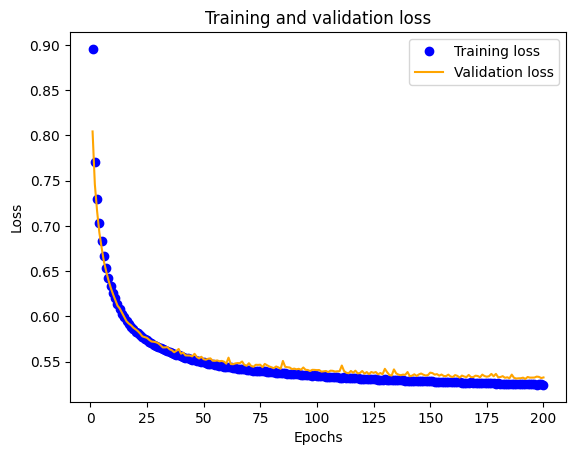

In [12]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')

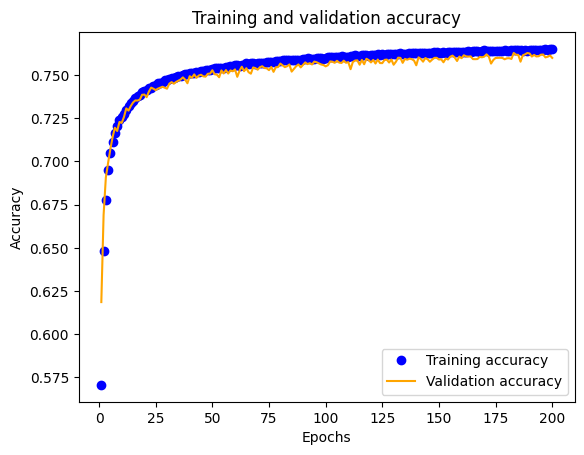

In [13]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#np.max(val_acc)
plt.savefig('accuracy.png')
plt.show()

In [14]:
preds = model.predict(X_test) 
predictionsFiles =np.argmax(preds, axis=1)

112434/112434 [==============================] - 77s 685us/step


In [15]:
pd.DataFrame(predictionsFiles).to_csv("predictionsFiles.csv",header='predict', index=False)

In [16]:
pd.DataFrame(y_test).to_csv("true.csv",header='true', index=False)

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5151300430297852
Test accuracy: 0.7877598404884338


Confusion matrix:
[[2158647  333078  285064]
 [  76058  315496   19192]
 [  47469    2753  360120]]


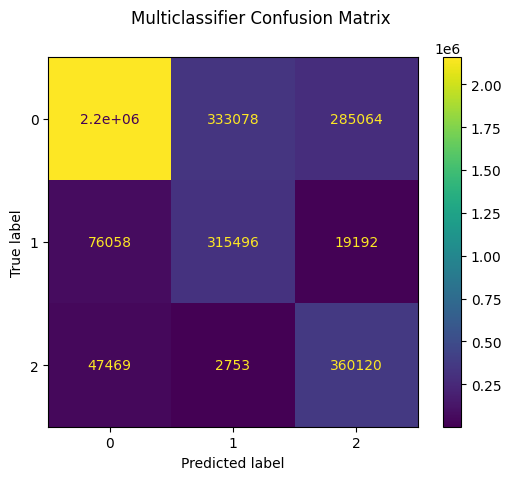

In [18]:
from sklearn import datasets, svm, metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictionsFiles)
disp.figure_.suptitle("Multiclassifier Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.savefig('confusionMatrix.png')
plt.show()

In [19]:
model.save('my_model.keras')

In [20]:
model.save('my_model.h5')

In [21]:
new_model = tf.keras.models.load_model('my_model.h5')
new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2,307
Trainable params: 2,307
Non-trainable params: 0
_________________________________________________________________


In [22]:
loss, acc = new_model.evaluate(X_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

112434/112434 - 87s - loss: 0.5151 - sparse_categorical_accuracy: 0.7878 - 87s/epoch - 778us/step
Restored model, accuracy: 78.78%
